In [1]:
import os
os.chdir("C:/Users/sokin/Documents/Zoocamp/capstone_project")

# Import libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
# from PIL import Image

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Model,load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
dir_ = os.getcwd()
data = os.path.join(dir_, 'data')
flowers = os.listdir(data) 
print(f"my directory:{dir_=},\nmy data directory: {data=} \nEach folder contains 1600 pictures from 7 flower types: ")
for i in flowers:
    print(i,'=',len(os.listdir(os.path.join(dir_, 'data', i))))

my directory:dir_='C:\\Users\\sokin\\Documents\\Zoocamp\\capstone_project',
my data directory: data='C:\\Users\\sokin\\Documents\\Zoocamp\\capstone_project\\data' 
Each folder contains 1600 pictures from 7 flower types: 
bellflower = 1600
daisy = 1600
dandelion = 1600
lotus = 1600
rose = 1600
sunflower = 1600
tulip = 1600


# Initially I will train localy a smaller img size because my computing power is limited

In [13]:
input_tensor  = Input(shape=(150,150,3))
img_size      = (150, 150)
batch_size    = 32  
num_epochs    = 30
learning_rate = 0.001

img_datagen = ImageDataGenerator(
                    rescale=1./150,
                    rotation_range=50,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip = True ,
                    vertical_flip = True ,
                    fill_mode='nearest',
                    validation_split=0.2)


train_generator = img_datagen.flow_from_directory(
        data,  # training data directory
        target_size=img_size,  
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical',
        subset='training')
 
validation_generator = img_datagen.flow_from_directory(
        data, # validation data directory
        target_size=img_size, 
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical',
        subset='validation')

Found 8960 images belonging to 7 classes.
Found 2240 images belonging to 7 classes.


# Import xception model + checkpoint + compile

In [15]:
base_model = Xception(weights='imagenet', pooling='avg', include_top=False,input_shape=(150, 150, 3))

In [16]:
base_model.trainable = True

model = models.Sequential()
model.add(base_model)
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax')) #softmax for multi-class classification


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21,387,823
Trainable params: 21,333,295
Non-trainable params: 54,528
_________________________________________________________________


In [22]:
model_file_path='./model_cnn.hdf5'

checkpoints = ModelCheckpoint(model_file_path,monitor='val_accuracy',
                                  mode='max',save_best_only=True)

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

# Jupyter's kernel crushed whenever I trained the CNN, the only available solution is the following

In [29]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Train

In [31]:
print(len(train_generator))
print(len(validation_generator))

# steps_per_epoch=train_generator.n/batch_size
steps_per_epoch=25
validation_steps=validation_generator.n/batch_size

result = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=num_epochs, 
      validation_data=validation_generator,
      validation_steps=validation_steps,
      verbose=1, 
      callbacks=[checkpoints]
      )

280
70
Epoch 1/30
25/25 [==============================] - 140s 5s/step - loss: 1.1748 - accuracy: 0.5838 - val_loss: 5.5843 - val_accuracy: 0.4692
Epoch 2/30
25/25 [==============================] - 139s 6s/step - loss: 0.7370 - accuracy: 0.7775 - val_loss: 2.8297 - val_accuracy: 0.6402
Epoch 3/30
25/25 [==============================] - 132s 5s/step - loss: 0.6980 - accuracy: 0.7950 - val_loss: 1.6632 - val_accuracy: 0.7696
Epoch 4/30
25/25 [==============================] - 132s 5s/step - loss: 0.6142 - accuracy: 0.8150 - val_loss: 1.7344 - val_accuracy: 0.6272
Epoch 5/30
25/25 [==============================] - 133s 5s/step - loss: 0.6265 - accuracy: 0.8188 - val_loss: 5.1979 - val_accuracy: 0.6304
Epoch 6/30
25/25 [==============================] - 132s 5s/step - loss: 0.5895 - accuracy: 0.8325 - val_loss: 2.1615 - val_accuracy: 0.6272
Epoch 7/30
25/25 [==============================] - 132s 5s/step - loss: 0.6944 - accuracy: 0.7987 - val_loss: 0.9667 - val_accuracy: 0.7366
Epoch 

In [ ]:
# According to here Pillow upgrade by pip install Pillow --upgrade should solve this issue.

# If you are still facing the problem you can use mogrify to batch convert all your images. mogrify -format png *.jpg

# @amazingboybrian It is Github. Post these errors, or you'll achieve nothing.
# Anyway, pip install --upgrade Pillow works for me.

# @ajaanbaahu
# ajaanbaahu commented on Mar 6, 2020
# uninstalling pillow installed using conda and re-installing using pip works

# Model Accuracy & Loss

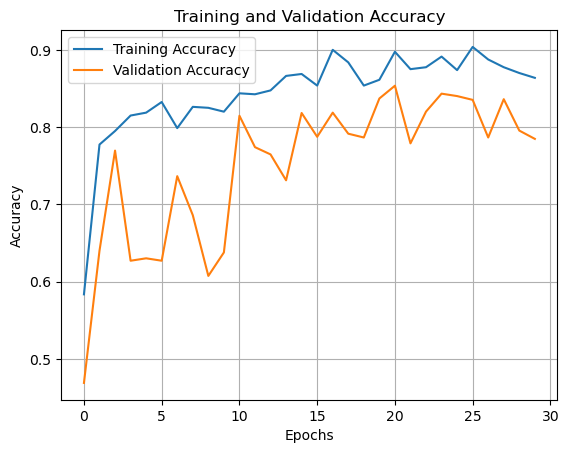

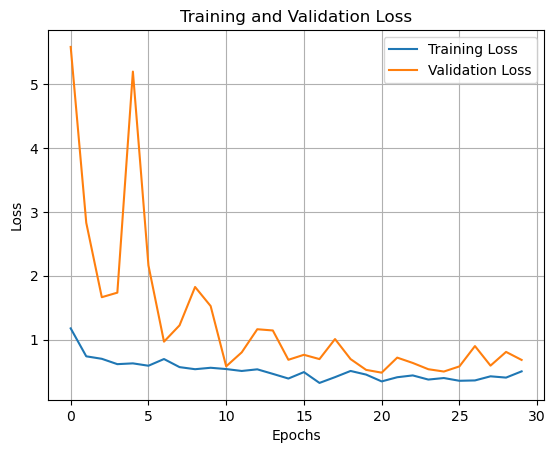

In [32]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

loss_train = result.history['loss']
loss_val = result.history['val_loss']
plt.plot(epochs, loss_train,  label='Training Loss')
plt.plot(epochs, loss_val, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Load the model_cnn and evaluate

70/70 [==============================] - 57s 819ms/step - loss: 0.4866 - accuracy: 0.8442
Train Accuracy: 88.53%
Validation Accuracy: 84.42%
70/70 [==============================] - 56s 785ms/step


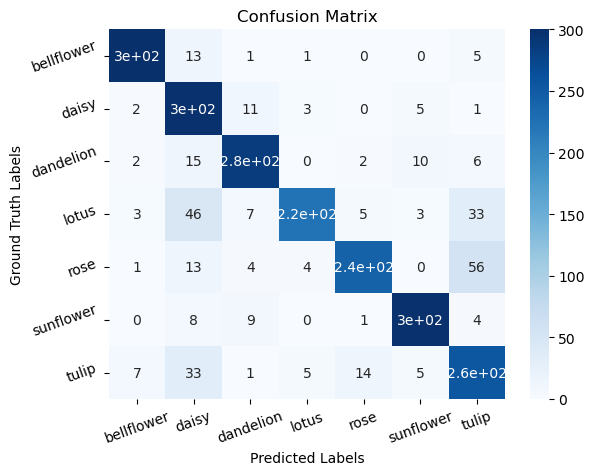

<Figure size 300x300 with 0 Axes>


              ---Classification Report---

              precision    recall  f1-score   support

  bellflower     0.9524    0.9375    0.9449       320
       daisy     0.6995    0.9313    0.7989       320
   dandelion     0.8962    0.8906    0.8934       320
       lotus     0.9449    0.6969    0.8022       320
        rose     0.9167    0.7562    0.8288       320
   sunflower     0.9283    0.9313    0.9298       320
       tulip     0.7083    0.7969    0.7500       320

    accuracy                         0.8487      2240
   macro avg     0.8638    0.8487    0.8497      2240
weighted avg     0.8638    0.8487    0.8497      2240



In [27]:
#Load model
model.load_weights(model_file_path)
validation_generator.reset()

# Model evaluation
scores_train = model.evaluate(train_generator,verbose=1)
scores_validation = model.evaluate(validation_generator, verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))

# Model Prediction
pred=model.predict(validation_generator, steps=validation_steps, verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

actual_class = validation_generator.classes
actual = [labels[k] for k in actual_class]
val_labels = [fn.split('/')[0] for fn in actual]

target_names=list(validation_generator.class_indices.keys())

# Confusion Matrix
cm=confusion_matrix(val_labels, predictions)
    
# Confusion Matrix Figure
fig = sns.heatmap(cm, annot=True, cmap = "Blues")
fig.set(title = 'Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')
fig.set_xticklabels(target_names,rotation=20)
fig.set_yticklabels(target_names,rotation=20)
plt.figure(figsize=(3,3))
plt.show(fig)

# Classification Report
cr=classification_report(val_labels, predictions, digits=4)
print("\n\n +++++ Classification Report +++++ \n\n")
print(cr)

# Load the model_xception and evaluate
###### I trained this model in Google Colab and was of bigger image size and parameters, thus giving me better accuracy 

In [30]:
input_tensor  = Input(shape=(225,225,3))
img_size      = (225, 225)
batch_size    = 32  
num_epochs    = 30
learning_rate = 0.001

img_datagen = ImageDataGenerator(
                    rescale=1./225,
                    rotation_range=50,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip = True ,
                    vertical_flip = True ,
                    fill_mode='nearest',
                    validation_split=0.2)


train_generator = img_datagen.flow_from_directory(
        data,  # training data directory
        target_size=img_size,  
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical',
        subset='training')
 
validation_generator = img_datagen.flow_from_directory(
        data, # validation data directory
        target_size=img_size, 
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical',
        subset='validation')

Found 8960 images belonging to 7 classes.
Found 2240 images belonging to 7 classes.


70/70 [==============================] - 126s 2s/step - loss: 0.2289 - accuracy: 0.9420
Train Accuracy: 99.53%
Validation Accuracy: 94.20%
70/70 [==============================] - 147s 2s/step


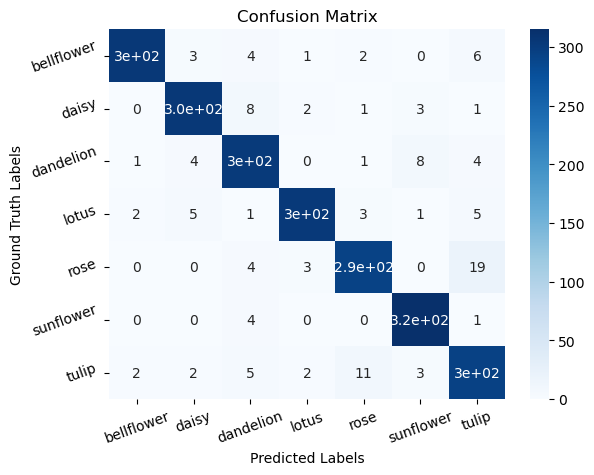

<Figure size 300x300 with 0 Axes>



 +++++ Classification Report +++++ 


              precision    recall  f1-score   support

  bellflower     0.9838    0.9500    0.9666       320
       daisy     0.9561    0.9531    0.9546       320
   dandelion     0.9207    0.9437    0.9321       320
       lotus     0.9743    0.9469    0.9604       320
        rose     0.9423    0.9187    0.9304       320
   sunflower     0.9545    0.9844    0.9692       320
       tulip     0.8912    0.9219    0.9063       320

    accuracy                         0.9455      2240
   macro avg     0.9461    0.9455    0.9457      2240
weighted avg     0.9461    0.9455    0.9457      2240



In [31]:
model_file_path = './model_xception.hdf5'

model.load_weights(model_file_path)
validation_generator.reset()

# Model evaluation
scores_train = model.evaluate(train_generator,verbose=1)
scores_validation = model.evaluate(validation_generator, verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))

# Model Prediction
pred=model.predict(validation_generator, steps=validation_steps, verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

actual_class = validation_generator.classes
actual = [labels[k] for k in actual_class]
val_labels = [fn.split('/')[0] for fn in actual]

target_names=list(validation_generator.class_indices.keys())

# Confusion Matrix
cm=confusion_matrix(val_labels, predictions)
    
# Confusion Matrix Figure
fig = sns.heatmap(cm, annot=True, cmap = "Blues")
fig.set(title = 'Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')
fig.set_xticklabels(target_names,rotation=20)
fig.set_yticklabels(target_names,rotation=20)
plt.figure(figsize=(3,3))
plt.show(fig)


# Classification Report
cr=classification_report(val_labels, predictions, digits=4)
print("\n\n +++++ Classification Report +++++ \n\n")
print(cr)

###### The model I trained in Google Colab (model_xception) gave amazing results
###### Train Accuracy: 99.53%
###### Validation Accuracy: 94.20%
###### however it is very close to overfitting, since the accuracy difference is ~5%, which I regard as a thresshold.. we always want stability for our model to generalize on another dataset!
###### Nonetheless it is clear that the model is stronger than the one I trained (smaller image size) localy on my pc with limited resources%